In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Generating the dataset {-}

In [3]:
def generate(k):
    
    # Initializing the constants. m here represents the number of features and not the number of datapoints.
    m, mu, sigma_sq = 20, 0, 0.1
    X, Y = np.zeros([k, m+1]), np.zeros([k,])
    
    for j in range(k):
        x_val, y_val = [], []
        
        # The first term is the bias
        x_val.append(1)
        
        def generate_x():
            for i in range(m):
                if i < 11 or i > 15:
                    x_val.append(np.random.normal(mu, 1))
                elif i == 11:
                    x_val.append(x_val[1] + x_val[2] + np.random.normal(mu, sigma_sq))
                elif i == 12:
                    x_val.append(x_val[3] + x_val[4] + np.random.normal(mu, sigma_sq))
                elif i == 13:
                    x_val.append(x_val[5] + x_val[6] + np.random.normal(mu, sigma_sq))
                elif i == 14:
                    x_val.append((0.1 * x_val[7]) + np.random.normal(mu, sigma_sq))
                elif i == 15:
                    x_val.append((2 * x_val[2]) - 10 + np.random.normal(mu, sigma_sq))
            X[j] = np.array(x_val)


        def generate_y(x):
            a = [0.6**(i) for i in range(1,11)]
            Y[j] = 10 + np.dot(a, x[1:11]) + np.random.normal(mu, sigma_sq)
            
        generate_x()
        generate_y(x_val)
        
    return X, Y

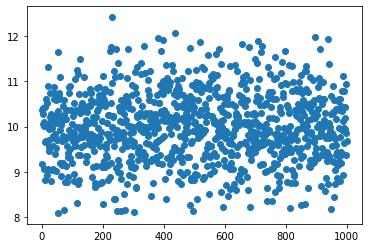

In [4]:
# The parameter passed here is the 'm', i.e., number of datapoints.
m_datapoints = 1000
lr_x, lr_y = generate(m_datapoints)
plt.scatter([p+1 for p in range(m_datapoints)], lr_y)
plt.show()

# Calculating the true bias and weights {-}

In [5]:
model_true_bias = 10
model_true_weights = [(0.6)**i for i in range(1, 11)]
for i in range(11, 21):
    model_true_weights.append(0)
print("True Bias is {}".format(model_true_bias))
print("True Weights are {}".format(model_true_weights))

True Bias is 10
True Weights are [0.6, 0.36, 0.21599999999999997, 0.1296, 0.07775999999999998, 0.04665599999999999, 0.027993599999999993, 0.016796159999999994, 0.010077695999999997, 0.006046617599999997, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


# Least Squares Regression model

In [6]:
class Linear_Regression:
    
    def naive_linear_regression(self, x, y):
        # Getting the number of datapoints and number of features.
        m, k = x.shape        
        x_transpose = np.transpose(x)
        
        # Applying the linear regression model to generate weights.
        self.weights = np.dot(np.dot(np.linalg.inv(np.dot(x_transpose, x)), x_transpose), y)
        return self.weights
    
    # This function is used to predict using the existing weights.
    def predict(self, x, weight):
        return np.dot(x, weight)

## Solving Least Squares method and finding the weights and bias that gives minimum error

[ 9.33948572e+00  6.09821410e-01  5.02909175e-01  2.37657342e-01
  1.52863525e-01  5.71959218e-02  2.82078280e-02  3.71365196e-02
  1.12807978e-02  8.99925313e-03  3.97377477e-04  4.26103574e-03
 -1.10936327e-02 -2.19905919e-02  1.54838018e-02 -8.97236174e-02
 -6.62964858e-02 -3.73489971e-03  4.55944878e-03 -5.95878117e-03
 -1.04809904e-03]


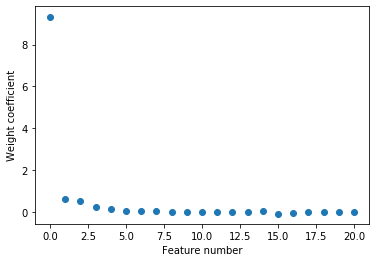

In [7]:
# Training a model and getting the weights.
m_datapoints = 1000
lr_x, lr_y = generate(m_datapoints)
lr = Linear_Regression()
lr_weights = lr.naive_linear_regression(lr_x, lr_y)
print(lr_weights)
plt.scatter([i for i in range(21)], lr_weights)
plt.xlabel("Feature number")
plt.ylabel("Weight coefficient")
plt.show()

## Comparison with true weights and bias

From our true model, we can see that the true bias value is 10. <br>
Also, we can see that the true weights from 1 to 10 would be $(0.6)^i$ and the remaining would have 0 as their weights.

In [8]:
print("The difference between true bias and the bias from the model is {}".format(abs(model_true_bias-lr_weights[0])))
print("The mean of the difference between true weights \
and the weights from the model is {}".format(np.mean(abs(model_true_weights-lr_weights[1:]))))

The difference between true bias and the bias from the model is 0.6605142803469572
The mean of the difference between true weights and the weights from the model is 0.024110003067968726


## Most and least significant features

In [134]:
lrmost_significant_value, lrleast_significant_value = float("-inf"), float("inf")
most_significant_feature, least_significant_feature = 0, 0
for i in range(1, len(lr_weights)):
    if abs(lr_weights[i]) > lrmost_significant_value:
        lrmost_significant_value = lr_weights[i]
        most_significant_feature = i
    if abs(lr_weights[i]) < least_significant:
        lrleast_significant_value = lr_weights[i]
        least_significant_feature = i
        
print("Most significant feature is {}".format(most_significant_feature))
print("Least significant feature is {}".format(least_significant_feature))
count = 0
for check_weight in lr_weights:
    if check_weight == 0 or check_weight == 0.00000000e+00:
        count += 1
print("The features that are pruned are {}".format(count))

Most significant feature is 1
Least significant feature is 20
The features that are pruned are 0


The least squares method did not prune any of the features. However, it had features whose coefficients were very low.

## Finding the training error {-}

In [10]:
prediction = lr.predict(lr_x, lr_weights)
mse = (np.square(prediction - lr_y)).mean()
print("Mean Squared training error is {}".format(mse))

Mean Squared training error is 0.009817660535715901


## Testing our model on new data

In [11]:
# Testing the model with 100k datapoints
test_x, test_y = generate(100000)
predict1 = lr.predict(test_x, lr_weights)
mse_testing = (np.square(predict1 - test_y)).mean()
print("Testing error is {}".format(mse_testing))

Testing error is 0.010375524869018434


# Ridge Regerssion model

In [12]:
class Ridge_Regression:
    def __init__(self, lam):
        # Passing the lambda value
        self.lam = lam
    
    def ridge_regression(self, x, y):
        m, k = x.shape
        identity = np.identity(k)    
        x_transpose = np.transpose(x)
        
        # Applying the ridge regression model to generate weights.
        self.weights = np.dot(np.linalg.inv(np.dot(x_transpose, x) + (self.lam * identity)), np.dot(x_transpose, y))
        return self.weights
    
    def predict_ridge(self, x, weight):
        return np.dot(x, weight)

## Training the Ridge Regression model

In [13]:
# Lambda value passed for testing is 0.001

train_rr_x, train_rr_y = generate(1000)
rr = Ridge_Regression(0.001)
rr_weights = rr.ridge_regression(train_rr_x, train_rr_y)
print(rr_weights)

[ 9.56907071e+00  6.36552759e-01  4.79810357e-01  1.92073987e-01
  1.05370630e-01  1.20924620e-01  9.31764849e-02  3.45357813e-02
  1.54727601e-02  1.15639920e-02  1.15134293e-02  3.49293146e-03
 -3.47190841e-02  2.56399716e-02 -4.52672370e-02 -2.62754090e-02
 -4.25211051e-02 -2.64024012e-03 -4.86603290e-03  1.00582276e-03
 -6.43233958e-03]


## Testing the Ridge Regression model on a large dataset

In [14]:
test_rr_x, test_rr_y = generate(100000)
ridge_testing = rr.predict_ridge(test_rr_x, rr_weights)
ridge_testing_mse = (np.square(ridge_testing - test_rr_y)).mean()
print("Testing error for ridge regression is {}".format(ridge_testing_mse))

Testing error for ridge regression is 0.010305213206589975


## Finding error as a function of different lambda values

The optimal lambda found out was : 0.0030999999999999986.


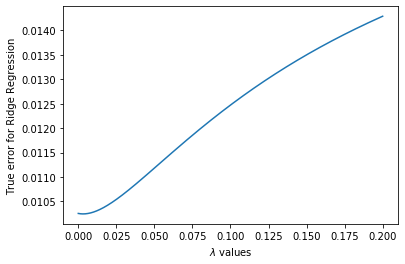

In [449]:
lambda_value = 0.
error_list, ridge_lambda_list = [], []
x_train_ridge, y_train_ridge = generate(1000)
x_test_ridge, y_test_ridge = generate(10000)
min_ridge_error, min_ridge_lambda = float('inf'), -1

while lambda_value <= 0.2:
    lambda_rr = Ridge_Regression(lambda_value)
    lambda_rr_weights = lambda_rr.ridge_regression(x_train_ridge, y_train_ridge)
    ridge_pred = rr.predict_ridge(x_test_ridge, lambda_rr_weights)
    error = (np.square(ridge_pred - y_test_ridge)).mean()
    error_list.append(error)
    if error < min_ridge_error:
        min_ridge_error = error
        min_ridge_lambda = lambda_value
    ridge_lambda_list.append(lambda_value)
    lambda_value += 0.0001

print("The optimal lambda found out was : {}.".format(min_ridge_lambda))
plt.plot(ridge_lambda_list, error_list)
plt.xlabel("$\lambda$ values")
plt.ylabel("True error for Ridge Regression")
plt.show()

## Plotting the weights {-}

[ 9.56907071e+00  6.36552759e-01  4.79810357e-01  1.92073987e-01
  1.05370630e-01  1.20924620e-01  9.31764849e-02  3.45357813e-02
  1.54727601e-02  1.15639920e-02  1.15134293e-02  3.49293146e-03
 -3.47190841e-02  2.56399716e-02 -4.52672370e-02 -2.62754090e-02
 -4.25211051e-02 -2.64024012e-03 -4.86603290e-03  1.00582276e-03
 -6.43233958e-03]


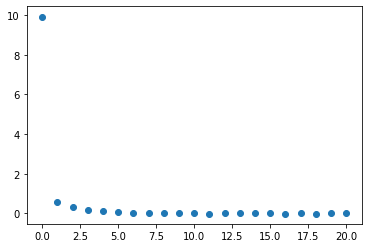

In [450]:
tr_rr_x, tr_rr_y = generate(1000)
rr_min_lambda = Ridge_Regression(min_ridge_lambda)
rr_lambda_weights = rr.ridge_regression(tr_rr_x, tr_rr_y)
print(rr_weights)
plt.scatter([i for i in range(21)], rr_lambda_weights)
plt.show()

## Comparison with true weights and bias for minimum error lambda weights

In [451]:
print("The difference between true bias and the bias from the model is \
{}".format(abs(model_true_bias - rr_lambda_weights[0])))
print("The mean of the difference between true weights \
and the weights from the model is {}".format(np.mean(abs(model_true_weights - rr_lambda_weights[1:]))))

The difference between true bias and the bias from the model is 0.07188371198977705
The mean of the difference between true weights and the weights from the model is 0.007665989493153037


## Most and least significant features for Ridge Regression

In [452]:
most_significant_ridge_value, least_significant_ridge_value = float("-inf"), float("inf")
most_significant_ridge_feature, least_significant_ridge_feature = 0, 0

for i in range(1, len(rr_lambda_weights)):
    if abs(rr_lambda_weights[i]) > most_significant_ridge_value:
        most_significant_ridge_value = rr_lambda_weights[i]
        most_significant_ridge_feature = i
    if abs(rr_lambda_weights[i]) < least_significant_ridge_value:
        least_significant_ridge_value = rr_lambda_weights[i]
        least_significant_ridge_feature = i
        
print("Most significant feature is {}".format(most_significant_ridge_feature))
print("Least significant feature is {}".format(least_significant_ridge_feature))

count = 0
for check_weight in rr_lambda_weights:
    if check_weight == 0. or check_weight == 0.00000000e+00:
        count += 1
print("The features that are pruned are {}".format(count))

Most significant feature is 1
Least significant feature is 11
The features that are pruned are 0


There were no features pruned for Ridge Regression as well.

## Comparing True errors of Least Squares method with Ridge Regression

In [453]:
print("Linear Regression error is {} and Ridge regression error is {}".format(mse_testing, min_ridge_error))
print("The difference between the error in least squares and ridge regression with optimal lambda value at {} is {} \
".format(min_ridge_lambda, mse_testing-min_ridge_error))

Linear Regression error is 0.010375524869018434 and Ridge regression error is 0.01024261520583057
The difference between the error in least squares and ridge regression with optimal lambda value at 0.0030999999999999986 is 0.0001329096631878645 


This result suggests that the error in Ridge Regression was a bit lower than naive least squares

### To see what happens when we increase the lambda to a high value. {-}

[ 0.35627539 -0.25837152  1.24983185  0.1001004   0.02316268  0.02486849
  0.01653813  0.02256044  0.01858878  0.00416703  0.00453051  0.00269915
  0.89395822  0.10708357  0.03647316 -0.00815388 -0.96015443 -0.01111841
 -0.00651789 -0.00408299  0.00324533]


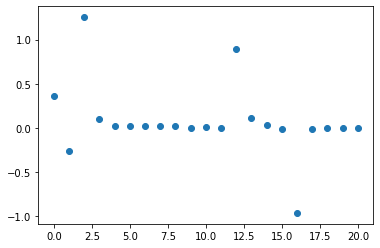

In [454]:
# Increased the lambda value to 100.

increasing_rr = Ridge_Regression(100)
increased_rr_weights = increasing_rr.ridge_regression(x_train_ridge, y_train_ridge)
print(increased_rr_weights)
plt.scatter([i for i in range(21)], increased_rr_weights)
plt.show()

As we can see, increasing the value of lambda to a high value forces a lot of features to have a really low weight. However, it does make any weight 0.

# Lasso Regression

In [439]:
class Lasso_Regression:
    
    def coordinate_descent_lasso(self, x, y, lamda = 1, num_iters=100):
        m, n = x.shape
        weights = np.ones((n, 1))
        for _ in range(num_iters): 
            for i in range(n):

                current_datapoint = x[:, i].reshape(-1, 1)
                current_datapoint_transpose = np.transpose(current_datapoint)
                y_prediction = np.dot(x, weights)
                prediction_difference = y - y_prediction
                denominator = np.dot(current_datapoint_transpose, current_datapoint)
                first_term = np.dot(current_datapoint_transpose, prediction_difference)
                numerator = -first_term + (lamda/2)
                final_value = numerator / denominator


                if i == 0:
                    weights[i] += prediction_difference.mean()
                else:
                    if (-first_term + (lamda/2)) / denominator < weights[i]:
                        weights[i] += ((first_term - (lamda/2)) / denominator)[0][0]
                    elif weights[i] < (-first_term - (lamda/2)) / denominator:
                        weights[i] += ((first_term + (lamda/2)) / denominator)[0][0]
                    else:
                        weights[i] = 0
                        
        return weights.flatten().reshape(-1, 1)
    
    def predict_lasso(self, x, weight):
        return np.matmul(x, weight)

## Plotting weights of features vs lambda values and showing as lambda value increases, the weights get pruned

The final weight at lambda = 2400 is [[9.98861584]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]]


(-120.0, 2520.0, -2.524727031946416, 1.1765385042526546)

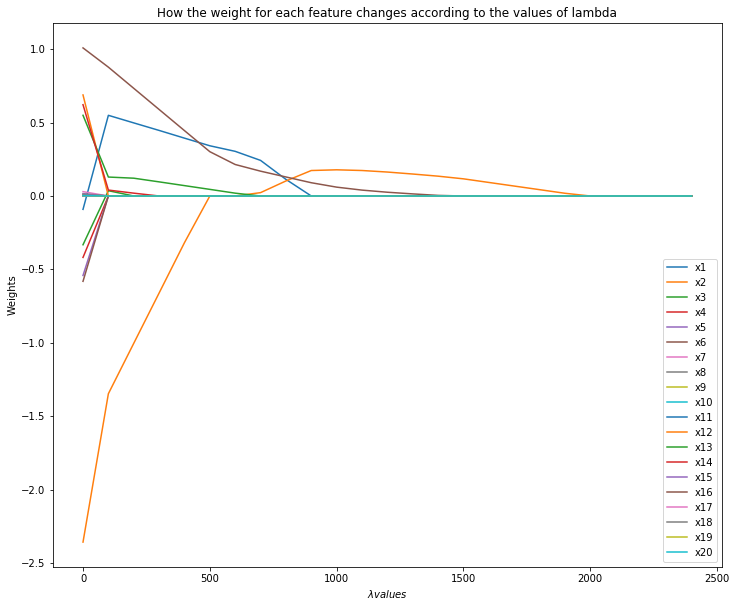

In [440]:
x_train_lasso, y_train_lasso = generate(1000)
y_train_lasso = y_train_lasso.reshape(-1, 1)

# Initialize variables
weight_list = list()
lamda = 0
lamda_array = []

# Starting from 0 lambda value and increasing it to maximum value of 3000.
while lamda < 2500:
    lamda_array.append(lamda)
    lamda += 100
    
# Error terms initialization
error_list_lasso, min_error, min_lambda = [], float('inf'), 0

# Initialization for min error weights
min_error_weights = None
    
#Run lasso regression for each lambda
for l in lamda_array:
    lassor = Lasso_Regression()
    current_weight = lassor.coordinate_descent_lasso(x_train_lasso, y_train_lasso, lamda = l, num_iters = 100)
    weight_list.append(current_weight)

weight_lasso = np.stack(weight_list).T
n, _ = weight_lasso[0].shape
plt.figure(figsize = (12,10))

print("The final weight at lambda = {} is {}".format(l, weight_list[-1]))
labels = ["x{}".format(i) for i in range(n)]
for i in range(1, n):
    plt.plot(lamda_array, weight_lasso[0][i], label = labels[i])

plt.xlabel('$\\lambda values$')
plt.ylabel('Weights')
plt.title('How the weight for each feature changes according to the values of lambda')
plt.legend()
plt.axis('tight')

From the graph above, we can see that as lambda value increases, the features are pruned.

# Lasso Regression Experiments

## Finding true error vs lambda

The lambda value with minimum error is 15
[[ 1.96611252e+01]
 [ 4.41346075e-01]
 [-1.71348367e+00]
 [ 7.35879392e-02]
 [ 0.00000000e+00]
 [ 2.98432270e-02]
 [ 0.00000000e+00]
 [ 2.78071941e-02]
 [ 5.06928028e-03]
 [ 2.28754943e-03]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 1.43560402e-01]
 [ 1.31075141e-01]
 [ 3.50437524e-02]
 [ 0.00000000e+00]
 [ 9.65936537e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]


Text(0.5, 1.0, '$\\lambda$ vs True Error')

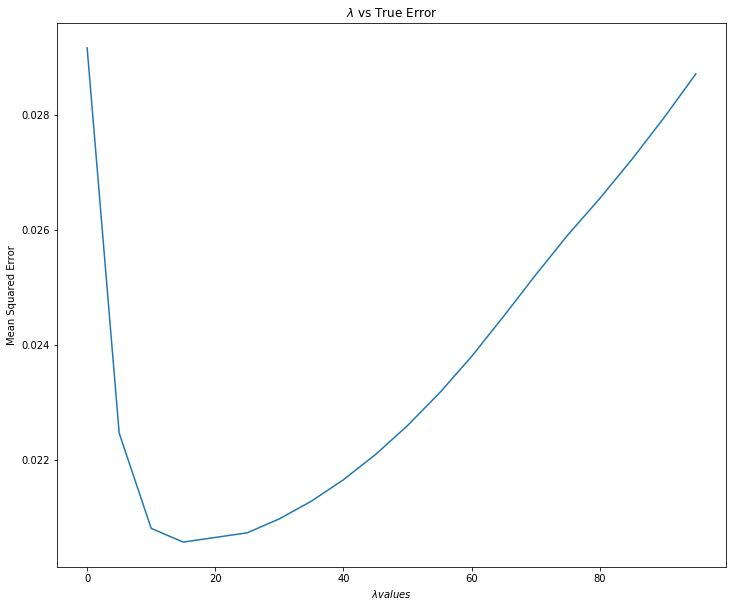

In [493]:
x_train_lasso, y_train_lasso = generate(1000)
y_train_lasso = y_train_lasso.reshape(-1, 1)
x_test_lasso, y_test_lasso = generate(10000)
y_test_lasso = y_test_lasso.reshape(-1, 1)

# Initialize variables
weight_list = list()
lamda = 0
lamda_array = []
while lamda < 100:
    lamda_array.append(lamda)
    lamda += 5
    
# Error terms initialization
error_list_lasso, min_error, min_lambda = [], float('inf'), 0

# Initialization for min error weights
min_error_weights = None
    
#Run lasso regression for each lambda
for l in lamda_array:
    lassor = Lasso_Regression()
    current_weight = lassor.coordinate_descent_lasso(x_train_lasso, y_train_lasso, lamda = l, num_iters = 100)
    weight_list.append(current_weight)
    lasso_prediction = lassor.predict_lasso(x_test_lasso, current_weight).reshape(-1, 1)
    error = (np.square(lasso_prediction - y_test_lasso)).mean()
    error_list_lasso.append(error)
    if error < min_error:
        min_error = error
        min_lambda = l
        min_error_weights = current_weight

print("The lambda value with minimum error is {}".format(min_lambda))

print(min_error_weights)
plt.figure(figsize = (12,10))
plt.plot(lamda_array, error_list_lasso)
plt.xlabel('$\\lambda values$')
plt.ylabel('Mean Squared Error')
plt.title('$\lambda$ vs True Error')

## Weights and bias values and comparison with true weights and bias

We find weights and bias for the optimal value of lambda here. The optimal lambda value is 20

In [479]:
x_optimal_lasso, y_optimal_lasso = generate(1000)
lassor = Lasso_Regression()
optimal_weight = lassor.coordinate_descent_lasso(x_optimal_lasso, y_optimal_lasso.reshape(-1, 1), \
                                                 lamda = min_lambda, num_iters = 100)

print("Bias in Lasso regression is {}".format(optimal_weight[0]))
print("The difference between true bias and the bias from the model is \
{}".format(abs(model_true_bias - optimal_weight[0])))
print("Weights in Lasso regression are {}".format(optimal_weight[1:]))
print("The mean of the difference between true weights \
and the weights from the model is {}".format(np.mean(abs(model_true_weights - optimal_weight[1:]))))

Bias in Lasso regression is [19.69288365]
The difference between true bias and the bias from the model is [9.69288365]
Weights in Lasso regression are [[ 4.84600844e-01]
 [-1.66848591e+00]
 [ 7.86073026e-02]
 [ 0.00000000e+00]
 [ 2.93390099e-02]
 [ 0.00000000e+00]
 [ 1.84770869e-02]
 [ 1.72157726e-03]
 [ 6.91153329e-04]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 9.62622533e-02]
 [ 1.33242132e-01]
 [ 4.79485929e-02]
 [ 0.00000000e+00]
 [ 9.69188023e-01]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]]
The mean of the difference between true weights and the weights from the model is 0.223865176103564


## Significant features and pruning

In [480]:
count, pruned_weights = 0, []
for i in range(1, 21):
    if optimal_weight[i] == 0:
        count += 1
        pruned_weights.append(i)
        
print("Most significant feature is {}".format(np.argmax(optimal_weight[1:])+1))
print("The number of pruned weights for this optimial lambda is {} \nThe features \
which were pruned are {}. And therefore, these are the least significant features.".format(count, pruned_weights))

Most significant feature is 16
The number of pruned weights for this optimial lambda is 9 
The features which were pruned are [4, 6, 10, 11, 15, 17, 18, 19, 20]. And therefore, these are the least significant features.


## Comparison of Least Squares method and Lasso Regression

In [481]:
print("The difference between the error in least squares and ridge regression with optimal lambda value at {} is {} \
".format(min_lambda, mse_testing-min_error))

The difference between the error in least squares and ridge regression with optimal lambda value at 20 is -0.010357552919329417 


This shows that the least squares method had a bit lower error as compared to lasso regression .

# Combining Lasso and Ridge together to use relevant features

## Finding relevant features and running Ridge regression on those features

In [487]:
x_ridge_lasso, y_ridge_lasso = generate(1000)
x_test_mixture, y_test_mixture = generate(10000)
y_ridge_lasso, y_test_mixture = y_ridge_lasso.reshape(-1, 1), y_test_mixture.reshape(-1, 1)
lassoridge = Lasso_Regression()
optimal_mixing_weight = lassoridge.coordinate_descent_lasso(x_ridge_lasso, y_ridge_lasso, lamda = min_lambda, num_iters = 100)

relevant_features = np.nonzero(optimal_mixing_weight)
irrelevant_array = []
for i in range(1, 21):
    if i not in relevant_features[0]:
        irrelevant_array.append(i)
        
final_mixture_weights = []
for i in range(len(optimal_mixing_weight)):
    if i in relevant_features[0]:
        final_mixture_weights.append(optimal_mixing_weight[i])
final_mixture_weights = np.array(final_mixture_weights).reshape(-1, 1)

x_test_mixture = x_test_mixture[:, relevant_features[0]]

ridge_lasso = Ridge_Regression(min_ridge_lambda)
ridge_lasso_testing = ridge_lasso.predict_ridge(x_test_mixture, final_mixture_weights)
ridge_testing_mse = (np.square(ridge_lasso_testing - y_test_mixture)).mean()
print("Error for ridge + lasso regression is {}".format(ridge_testing_mse))

Error for ridge + lasso regression is 0.02180135564912317


## Ridge Regression regularization constant

The regularization constant that we found out during the Ridge Regression testing, we would use that constant here too.

## Comparison of error with least squares regression

In [488]:
print("Linear Regression error is {} and Ridge regression error is {}".format(mse_testing, ridge_testing_mse))
print("The difference between the error in least squares and ridge + lasso regression is {} \
".format(mse_testing-ridge_testing_mse))

Linear Regression error is 0.010375524869018434 and Ridge regression error is 0.02180135564912317
The difference between the error in least squares and ridge + lasso regression is -0.011425830780104736 


From here, the result depicts that the least squares regression model was a bit better than the combination of ridge and lasso regression.

## Relevant and Irrelevant features

In [489]:
print("The relevant features are : {}".format(relevant_features[0]))
print("The irrelevant features are : {}".format(irrelevant_array))

The relevant features are : [ 0  1  2  3  5  7  8  9 12 13 14 16]
The irrelevant features are : [4, 6, 10, 11, 15, 17, 18, 19, 20]


## Testing Error

In [491]:
print("The difference between the error in least squares and ridge + lasso regression is {} \
".format(mse_testing-ridge_testing_mse))

The difference between the error in least squares and ridge + lasso regression is -0.011425830780104736 


As seen from the the above cell, we can see that the least square regression has a bit less testing error than the combination of ridge + lasso regression.

# SVM

## Implementation of Barrier-Method dual SVM solver

In [29]:
# This class works for linear SVM. The kernel function is added in the next question.
class SVM: 
    
    def __init__(self):
        # Initial epsilon values and learning rates are mentioned here.
        self.epsilon = 1
        self.learning_rate = 0.01
    
    def differentiation(self, x, y, alphas, time, j):
        length = len(alphas)
        
        # Here, we calculate the differentiation of the svm term.
        first_sum, second_sum, third_sum = 0, 0, 0
        for i in range(1, length):
            first_sum += alphas[i] * y[i]
            second_sum += alphas[i] * y[i] * np.dot(x[i], x[0])
            third_sum += alphas[i] * y[i] * np.dot(x[i], x[j]) * y[j]
        
        # The value of barrier differentiation term is calculated here.
        barrier_term = (self.epsilon / 2**time) * ((1 / alphas[j]) + y[j] / first_sum)
        
        # The final values for svm and barrier differentiation are added in this final term. 
        final_differentiation_result = - 1 + (y[j] * y[0]) + ((np.dot(x[0], x[0]) * first_sum * y[j]) - y[j] * (second_sum + (np.dot(x[j], x[0]) * first_sum)) + third_sum) + barrier_term
                
        return final_differentiation_result

    def barrier_svm(self, x, y, alphas, time):
        length = len(alphas)
        temp_alphas = np.zeros((length - 1, 1))
        summation, count = 0, 0
           
        # We loop on individual alphas from 1 to m.    
        for current_alpha in range(1, length):
                
            result = self.differentiation(x, y, alphas, time, current_alpha)
            
            '''
            If the difference between the diffrentiation 
            value and the previous value is not large, we skip updating that particular alpha value.
            '''
            if abs(result) < 0.00001:
                count += 1
            else:
                temp_alphas[current_alpha - 1] = result
        
        '''
        This is the final stopping condition. If the updation of all the alphas is skipped for a 
        particular time instance, we break out of the updation and return the final alphas we have.
        '''
        if count == length-1:
            return alphas, False
        else:
            new_alphas = np.array(alphas[1:]).reshape(3, 1)
            new_alphas = list(new_alphas - self.learning_rate * temp_alphas)

            # Changing the value of alpha_1 according to satisfy the constraint.
            for i in range(1, len(alphas)):
                summation = summation + (y[i] * new_alphas[i - 1])
            new_alphas.insert(0, -summation)
            return new_alphas, True

## Initial feasible values of alphas

The values for $\alpha_2$ to $\alpha_m$ are selected randomly in the constraint set. Then, using $\alpha_1 = -\sum_{i=2}^{m}\alpha_i(y^i * y^1)$, we find the value for $\alpha_1$. And, this satisfies our given constraint. Unless we get an optimal alpha values, the "check_constraints" function is called again and again.

In [30]:
def check_constraints(x, y, alphas):
    length = len(y)
    summation = 0
    for i in range(1, length):
        summation += alphas[i] * y[i] * y[0]
    return -summation

## Not moving out of the constraint set

The barrier method has a strength value, $\epsilon$ multiplied to it that keeps check if the constraint is satisfied or not. So, as we inch closer to the boundary, the barrier function creates an artificial barrier that keeps the values inside the constraint set. And, if there is an optimal value on the boundary, we can satisfy that problem by slowly redicing the power of the barrier function through $\epsilon$. 

## Choosing the $\epsilon_t$ value
Taking the step size close and using the barrier function would make sure that we don't step outside the constraint region. The value for $\epsilon_t$ changes exponentially by the order of $\frac{1}{2^t}$. This makes sure we get good convergence in least amount of steps possible.

# Solving XOR gate using SVM

## Using SVM solver to solve XOR data using Kernel function.

In [369]:
class SVM: 
    
    def __init__(self):
        self.epsilon = 1
        self.learning_rate = 0.01
        
    # The kernel function is implemented here.
    def kernel_function(self, x1, x2):
        return (1 + np.dot(x1, x2)) ** 2
    
    def differentiation(self, x, y, alphas, time, j):
        length = len(alphas)

        first_sum, second_sum, third_sum = 0, 0, 0
        for i in range(1, length):
            first_sum += alphas[i] * y[i]
            second_sum += alphas[i] * y[i] * self.kernel_function(x[i], x[0])
            third_sum += alphas[i] * y[i] * self.kernel_function(x[i], x[j]) * y[j]

        barrier_term = (self.epsilon / 2**time) * ((1 / alphas[j]) + y[j] / first_sum)

        final_differentiation_result = 1 - (y[j] * y[0]) - ((self.kernel_function(x[0], x[0]) * first_sum * y[j]) - y[j] * (second_sum + (self.kernel_function(x[j], x[0]) * first_sum)) + third_sum) + barrier_term
            
        return final_differentiation_result

    def barrier_svm(self, x, y, alphas, time):
        length = len(alphas)
        temp_alphas = np.zeros((length - 1, 1))
        summation, count = 0, 0
           
        for current_alpha in range(1, length):
                
            result = self.differentiation(x, y, alphas, time, current_alpha)
            if abs(result) < 0.00001:
                count += 1
            else:
                temp_alphas[current_alpha - 1] = result
                
        if count == length-1:
            return alphas, False
        else:
            new_alphas = np.array(alphas[1:]).reshape(3, 1)
            new_alphas = list(new_alphas + self.learning_rate * temp_alphas)

            for i in range(1, len(alphas)):
                summation = summation + (y[i] * new_alphas[i - 1])
            new_alphas.insert(0, -summation)
            return new_alphas, True

In [370]:
x = [[1, -1], [1, 1], [-1, 1], [-1, -1]]
y = [1, -1, 1, -1]
input_length = len(y)

# This loop makes sure that all the alphas satisfy the constraint.
while True:
    alphas = []
    for i in range(input_length):
        alphas.append(random.random())
    a = check_constraints(x, y, alphas)
    if a > 0:
        alphas[0] = a
        break
print("The initial alphas are {}".format(alphas))

svm = SVM()
for time in range(1, 500):
    alphas, flag = svm.barrier_svm(x, y, alphas, time)
    if not flag:
        break
        
print("Alpha 1 : {} \nAlpha 2 : {} \nAlpha 3 : {} \nAlpha 4 : {}".format(alphas[0][0], alphas[1][0], alphas[2][0], alphas[3][0]))
print("It took {} iterations to converge.".format(time))

The initial alphas are [0.3654999638361417, 0.4815131521435503, 0.2942935672628596, 0.178280378955451]
Alpha 1 : 0.12500029807772872 
Alpha 2 : 0.1250008926429575 
Alpha 3 : 0.12500148964504978 
Alpha 4 : 0.125000895079821
It took 150 iterations to converge.


## Solving the SVM question by hand to verify the results we got

![title](1HW5.jpg)
![title](2HW5.jpg)
![title](3HW5.jpg)
![title](4HW5.jpg)

As we can see from handwritten answers, out result for SVM is verified

# Reconstructing the Primal problem and showing that it correctly classifies the XOR data.

To reconstruct the Primal problem, we need to find weights and bias and classify according to the sign of the result.
For reconstruction, the formulas we need are : <br>
$\underline{w} = \sum_{i=1}^m \alpha_i y_i \underline{x}_i$, <br>
$\sum_{i=1}^m\alpha_i y_i = 0$, and <br>
Using this above equation for reconstruction of Primal SVM would give us 0 as this equation is for Lineary separable SVM. Hence, we would need to calculate w * x for our reconstruction process. <br>
And, $b = y_i - \underline{w} . \underline{x}_i$


In [409]:
# Trying to find w

final_alphas = np.array([0.125, 0.125, 0.125, 0.125])
length = len(y)

# Initialized with size 2 as we have 2 features
w = [0, 0]
for i in range(length):
    w += np.dot(np.dot(np.transpose(final_alphas[i]), np.array(y[i])), np.array(x[i]))
print(w)

[0. 0.]


As this XOR data is symmetric, we would always get w as so. As a result, we need to find w * x using kernel function.

The formula for kernel function to calculate w * x is: <br>
$\underline{w}.\underline{x} = \sum_{i=1}^m \alpha_i y_i K(\underline{x}_i.\underline{x})$ <br>
here, the x is the point we want to classify

In [418]:
def calculate_kernel(x1, x2):
    return (1 + np.dot(np.transpose(x1), x2)) ** 2

final_alphas = np.array([0.125, 0.125, 0.125, 0.125])
length = len(y)

# All points have non-zero alpha so we can select any point to calculate bias. Let's select the first point.
w_x, bias = 0, 0
selected_x, selected_y = np.array([1, -1]), 1
for i in range(length):
    w_x += final_alphas[i] * y[i] * calculate_kernel(x[i], selected_x)
    
bias = selected_y - w_x

print("w * x = {}\nBias = {}".format(w_x, bias))

w * x = 1.0
Bias = 0.0


In [427]:
'''
We would be using x, y, bias, and alphas from the above cell and classify an input through "classify" function.
We have to calculate new w * x called 'result' as in the previous cell, "w_x" was just used to find bias for our model.
'''

def classify(find_x):
    result = 0
    for i in range(length):
        result += final_alphas[i] * y[i] * calculate_kernel(x[i], find_x)
    return np.sign(result + bias)

print("The result for [1, -1] is {}".format(classify([1, -1])))
print("The result for [-1, -1] is {}".format(classify([-1, -1])))
print("The result for [-1, 1] is {}".format(classify([-1, 1])))
print("The result for [1, 1] is {}".format(classify([1, 1])))

The result for [1, -1] is 1.0
The result for [-1, -1] is -1.0
The result for [-1, 1] is 1.0
The result for [1, 1] is -1.0


As we can see, this new primal classifier classifies the given data correctly.